# Problem 1

## Importing necessary libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Part 1

Loading the dataset

In [5]:
from sklearn.model_selection import train_test_split

dataset = np.load('mnist.npz')

X = dataset['X'].T
y = dataset['y'].T

X_train, X_test, y_train, y_test = train_test_split(X, y)

## Part 2

Normalizing the data

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train_normal = scaler.transform(X_train)
X_test_normal = scaler.transform(X_test)

## Part 3

finding the best k for KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy_train = []
accuracy_test = []
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    y_test_pred =  knn.predict(X_test)

    accuracy_train.append(accuracy_score(y_train_pred, y_train))
    accuracy_test.append(accuracy_score(y_test_pred, y_test))

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

plotting accuracies

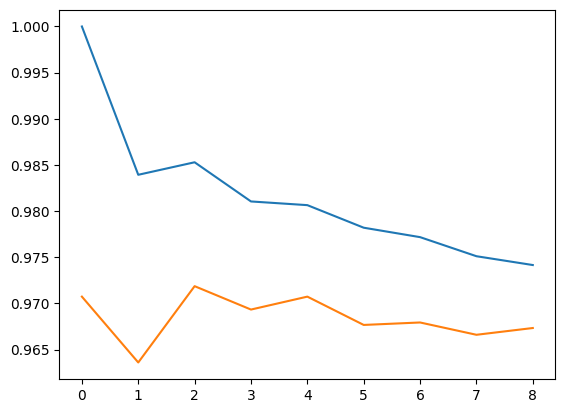

In [8]:
plt.plot(accuracy_train)
plt.plot(accuracy_test)

## Part 4

choosing two class from 10 classes

In [9]:
indexes_of4 = np.where(y_train == 4)[0]
indexes_of8 = np.where(y_train == 8)[0]

print(indexes_of4)

[    6    14    15 ... 44984 44989 44995]


concatenating two classes

In [10]:
X_new = np.concatenate((X[indexes_of4], X[indexes_of8]), axis=0)
y_new = np.concatenate((y[indexes_of4], y[indexes_of8]), axis=0)

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new)


reshaping y_new

In [11]:
y_new = y_new.reshape(-1, )
y_new

array([0., 0., 0., ..., 7., 7., 7.])

fitting SVC

In [12]:
from sklearn.svm import SVC

svc = SVC().fit(X_train_new, y_train_new)


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


finding the accuracy using K-Fold Cross-Validation method

In [13]:
from sklearn.model_selection import KFold, cross_val_score

cv = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(svc, X_new, y_new, cv=cv)
print(scores)
print("mean score: ", np.mean(scores))

[0.97424156 0.97767602 0.97996566 0.96907216 0.97479954]
mean score:  0.9751509870299666


## Part 5

making svm models for unique pairs of classes in MNIST dataset

In [14]:
from sklearn.metrics import accuracy_score

SVCs = np.zeros((10, 10), dtype=SVC)
indexes = []
acc_scores = []

for i in range(10):
    for j in range(i+1, 10):
            indexes1 = np.where(y_train == i)[0]
            indexes2 = np.where(y_train == j)[0]
            
            X_new_temp = np.concatenate((X[indexes1], X[indexes2]), axis=0)
            y_new_temp = np.concatenate((y[indexes1], y[indexes2]), axis=0)
            
            X_train_new_temp, X_test_new_temp, y_train_new_temp, y_test_new_temp = train_test_split(X_new_temp, y_new_temp)

            svc_temp = SVC().fit(X_train_new_temp, y_train_new_temp)

            SVCs[i][j] = svc_temp

            y_pred_new_temp = svc_temp.predict(X_test_new_temp)

            acc_scores.append(accuracy_score(y_pred_new_temp, y_test_new_temp))
            indexes.append(f"{i}_{j}")

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

ploting accuracy scores

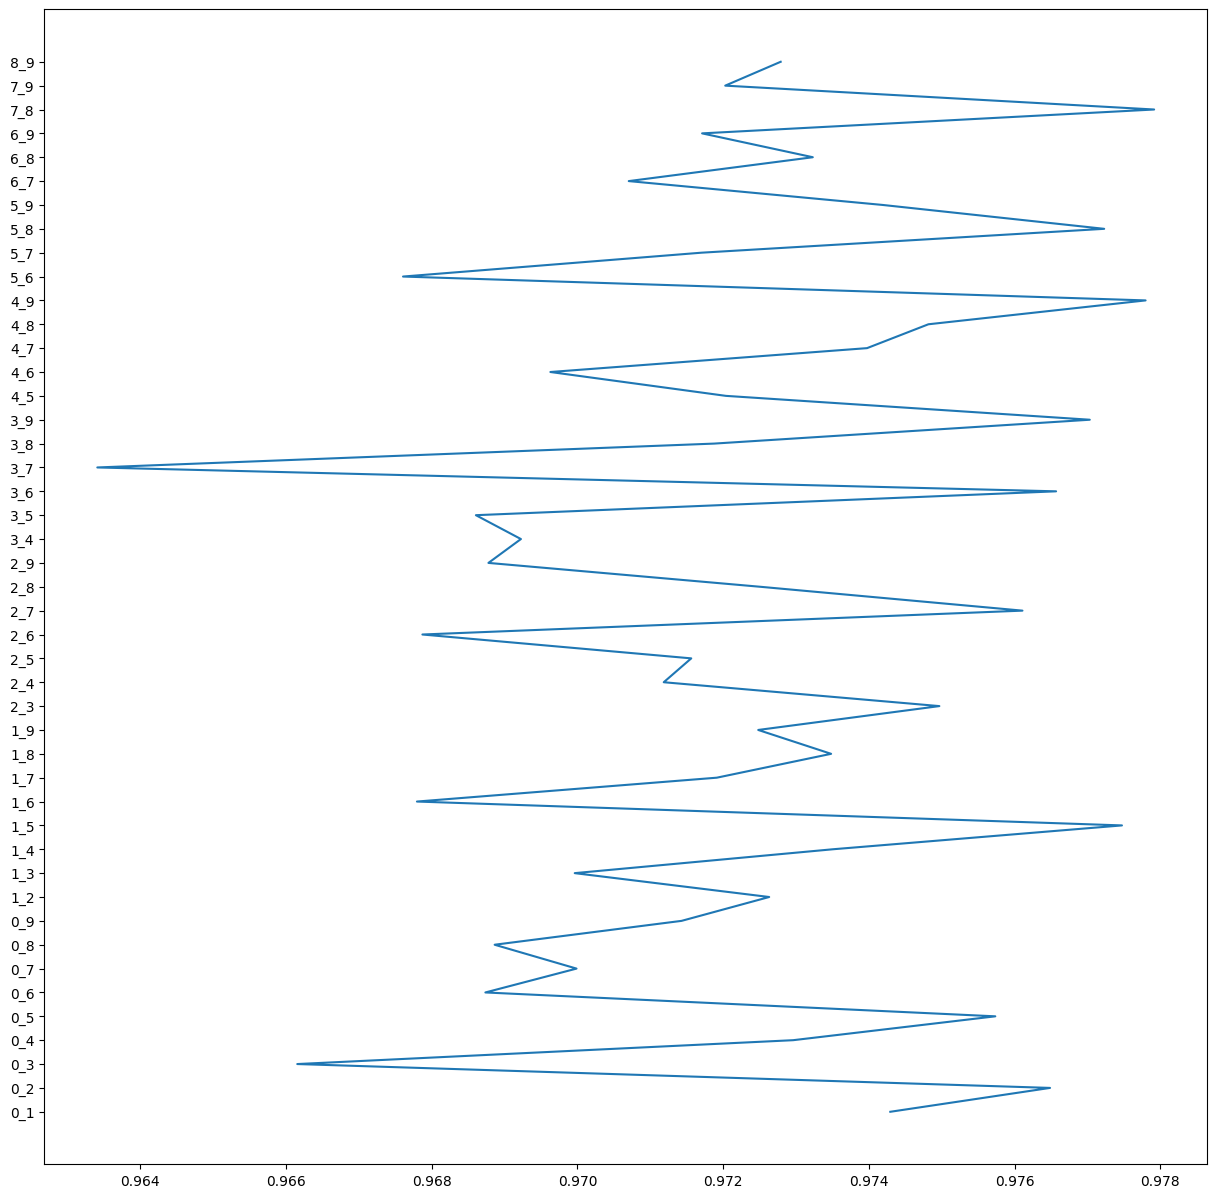

In [15]:
plt.figure(figsize=(15, 15))
plt.plot(acc_scores, indexes)

finding the minimum accuracy

In [16]:
i = np.argmin(acc_scores)
print(acc_scores[i], indexes[i])

0.9634093844167025 3_7


## Part 6

using the models that I just created to predict a new x sample 

In [42]:
index = np.random.randint(X.shape[0])
X_sample = X[index, :]

predictions = []
for i in range(10):
    for j in range(i+1, 10):
        predictions.append(SVCs[i][j].predict([X_sample]))

# print(predictions)
predictions = np.ravel(predictions)

# print(predictions)
ans = np.argmax(np.bincount(predictions.astype('int64')))

print("Final Prediction:", ans)
print("Real value", int(y[index]))

Final Prediction: 2
Real value 2


## Part 7

comparing two models

In [18]:
print("mean score of svc:", np.mean(acc_scores))
print("best score of knn:", accuracy_test[np.argmax(accuracy_test)])

mean score of svc: 0.9722432075546497
best score of knn: 0.9718666666666667
